In [3]:
import numpy as np
import pandas as pd
import os
import string

In [4]:
dataset = pd.read_csv("data.csv")

In [5]:
dataset.head(100)

,Unnamed: 0,isHealthy,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,Black_rot,109.290268,120.872437,93.792892,63.903836,51.597123,64.408851,806.727717,0.871684,0.072841,13.924102
1,0,Black_rot,128.443405,137.412827,114.801193,50.916858,44.833912,58.034531,661.424270,0.850571,0.077148,13.658209
2,0,Black_rot,105.817230,117.391693,101.533737,63.089894,52.666284,65.218182,225.235099,0.964996,0.155774,12.697456
3,0,Black_rot,115.003677,126.788773,109.580978,51.001996,41.572264,54.900597,149.451142,0.963721,0.184731,12.172536
4,0,Black_rot,117.467407,125.006973,106.502304,59.922952,46.281336,60.762472,733.955890,0.861248,0.065945,13.807278
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Black_rot,117.007446,118.654404,105.815155,52.340704,41.583702,57.419900,173.993264,0.958669,0.146420,12.609029
96,0,Black_rot,110.488693,114.970001,90.848419,45.569904,43.947626,54.816115,441.286252,0.888014,0.092562,13.384471
97,0,Black_rot,117.038895,123.727386,97.428360,59.080055,47.521184,64.069630,416.477798,0.923179,0.095549,13.455074
98,0,Black_rot,103.009293,105.733002,83.684067,53.672936,42.111158,61.076821,338.525418,0.923821,0.096440,12.844524


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


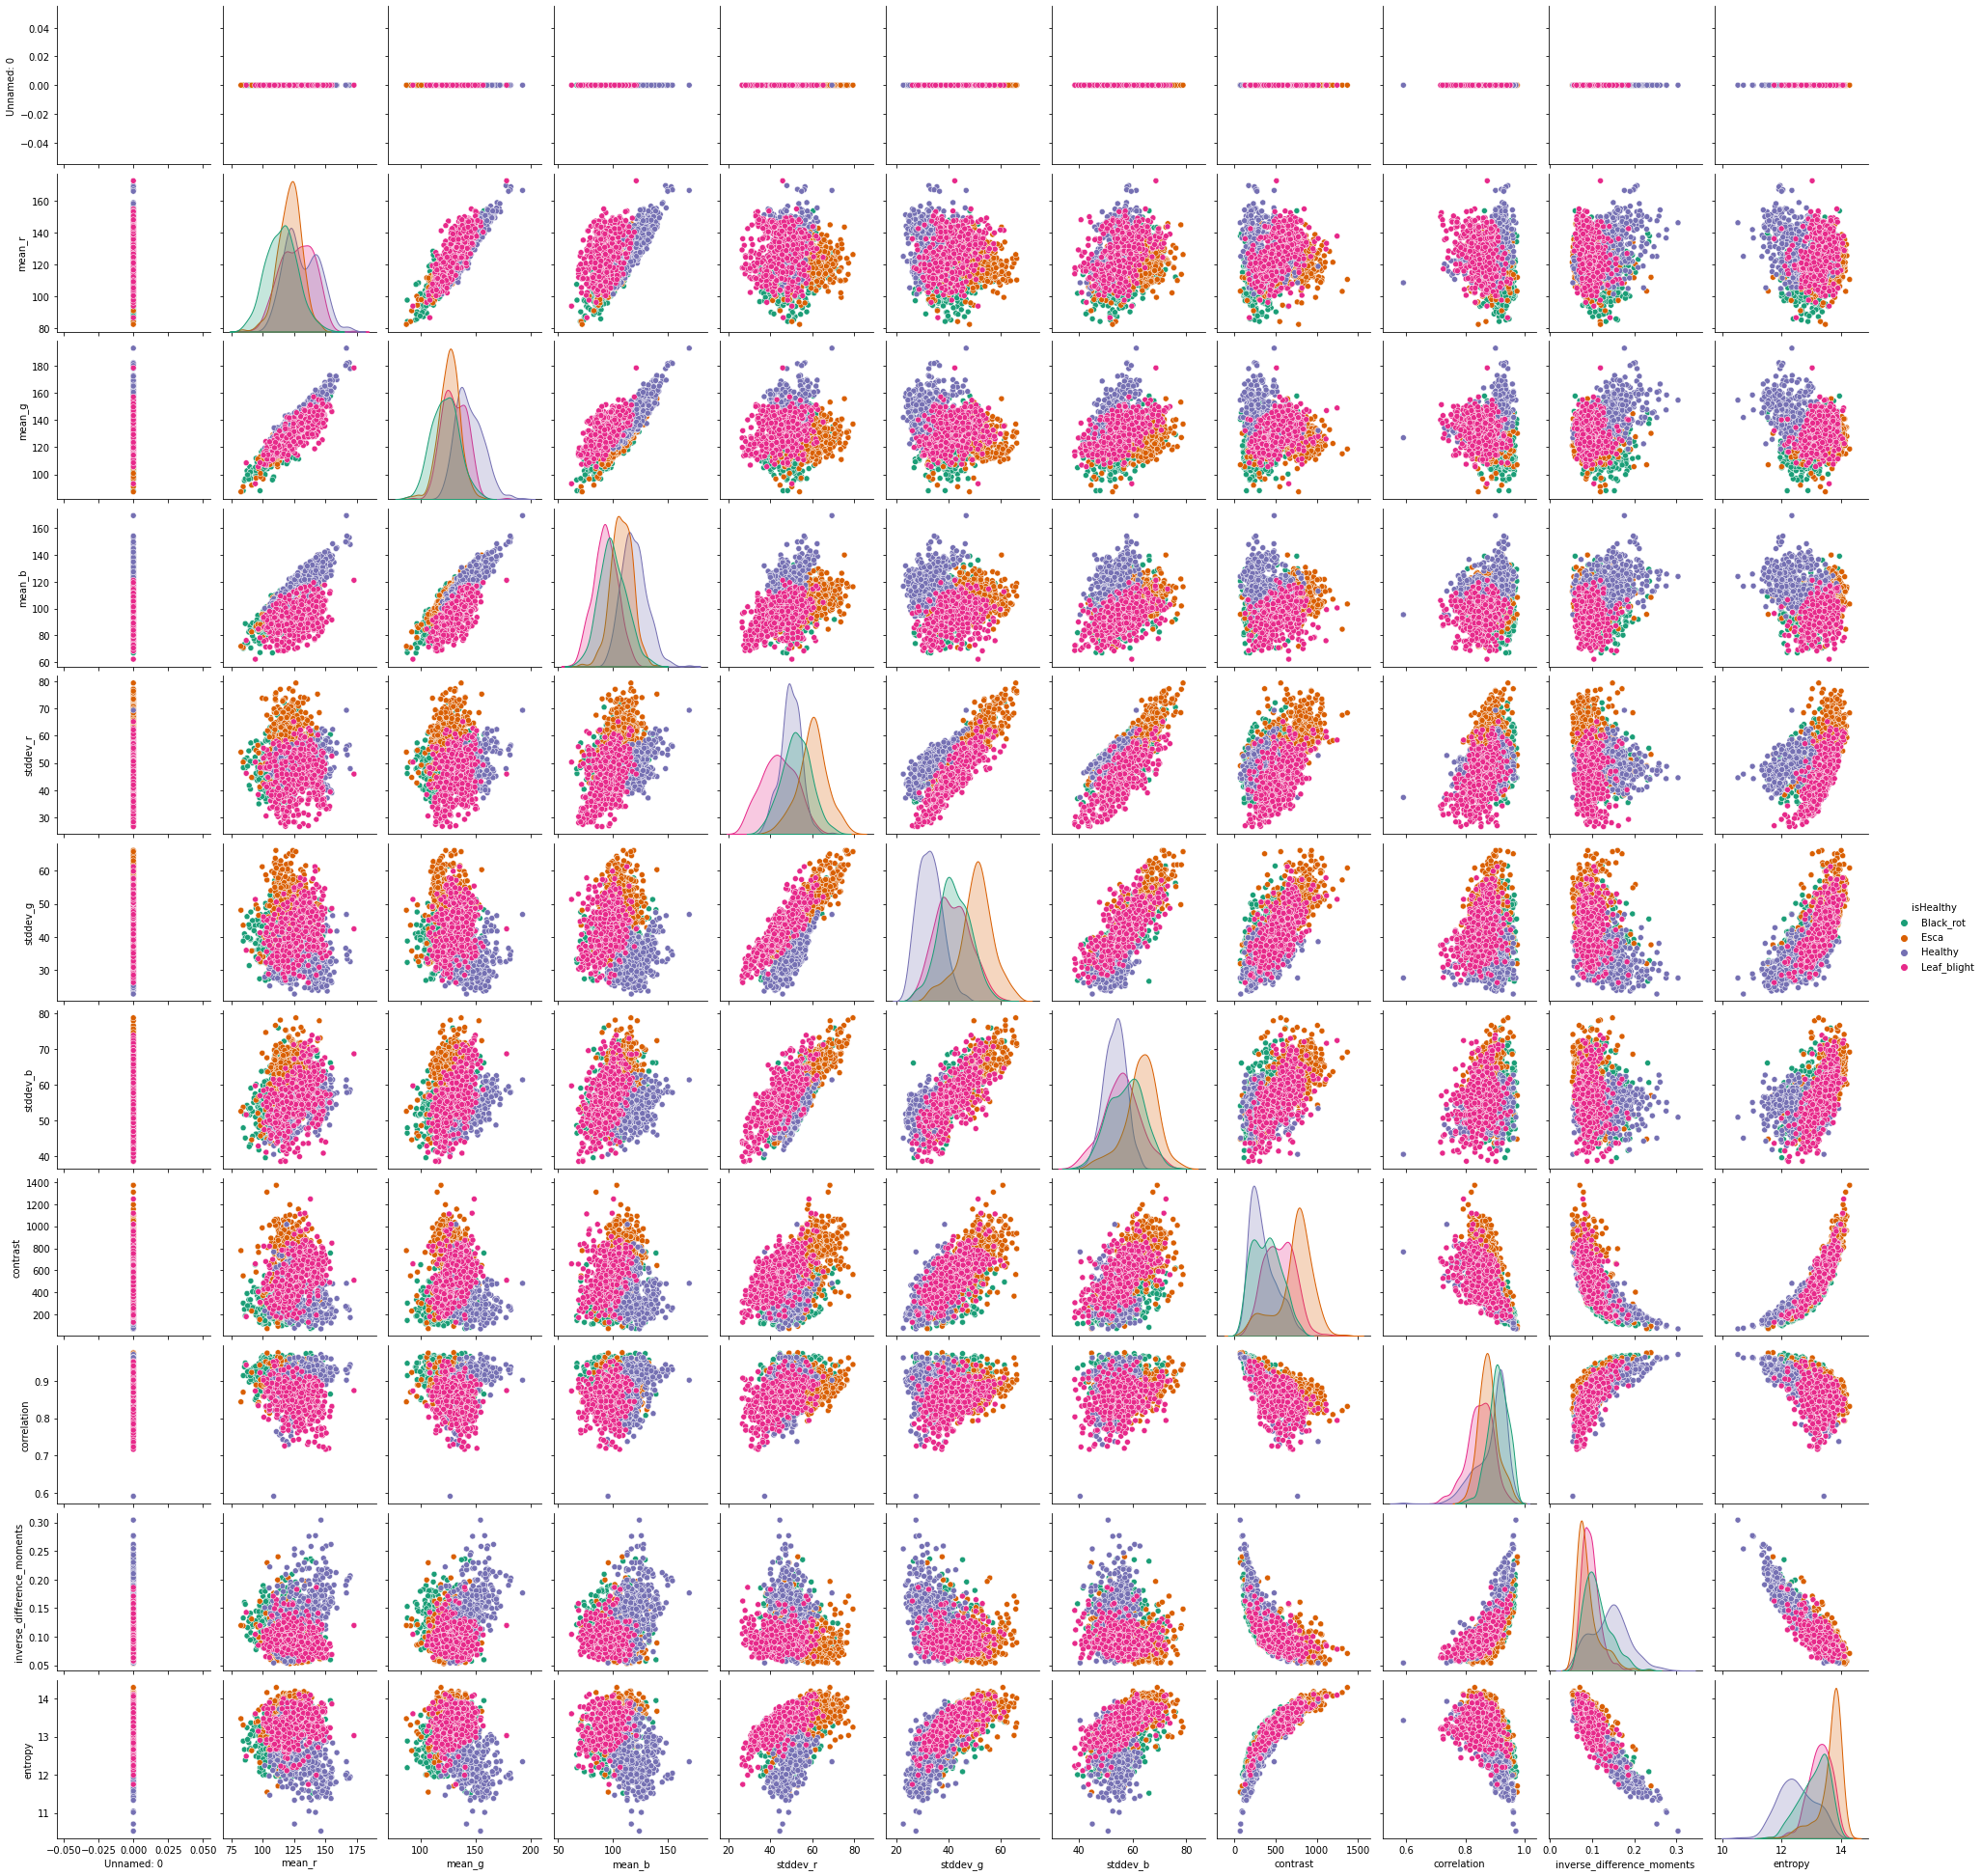

In [68]:
import seaborn as sns
sns.pairplot(dataset,hue='isHealthy',palette='Dark2')

In [11]:
#Healthy
dataset['isHealthy']
target_list = []
for d in dataset['isHealthy']:
  if d == "Healthy":
    target_list.append(0)
  else:
    target_list.append(1)
target_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [12]:
y = np.array(target_list)
y

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
X = dataset.iloc[:,2:]

In [41]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,109.290268,120.872437,93.792892,63.903836,51.597123,64.408851,806.727717,0.871684,0.072841,13.924102
1,128.443405,137.412827,114.801193,50.916858,44.833912,58.034531,661.424270,0.850571,0.077148,13.658209
2,105.817230,117.391693,101.533737,63.089894,52.666284,65.218182,225.235099,0.964996,0.155774,12.697456
3,115.003677,126.788773,109.580978,51.001996,41.572264,54.900597,149.451142,0.963721,0.184731,12.172536
4,117.467407,125.006973,106.502304,59.922952,46.281336,60.762472,733.955890,0.861248,0.065945,13.807278


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20


# test is now 20% of the initial data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

# train is now 70% of the entire data set
# validation is now 10% of the initial data set
x_train,x_val,y_train ,y_val = train_test_split(x_train, y_train, test_size=validation_ratio/(train_ratio + validation_ratio)) 
#print(x_train, x_val, x_test)
print(len(x_train), len(x_val), len(x_test))



1183 170 339


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_val = sc_X.transform(x_val)
X_test = sc_X.transform(x_test)

In [47]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [54]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    5.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [58]:
print("First way " , svm_clf.best_estimator_)
print("Second way " , grid.best_estimator_)

First way  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Second way  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [60]:
y_pred = svm_clf.predict(X_val)

grid_predictions = grid.predict(X_val)

In [62]:
print("First way " , metrics.accuracy_score(y_val, y_pred))
print("Second way " , metrics.accuracy_score(y_val, grid_predictions))

First way  0.9823529411764705
Second way  0.9823529411764705


In [66]:
y_pred = svm_clf.predict(X_test)
grid_predictions = grid.predict(X_test)

In [67]:
print("First way " , metrics.accuracy_score(y_test, y_pred))
print("Second way " , metrics.accuracy_score(y_test, grid_predictions))

First way  0.9941002949852508
Second way  0.9941002949852508
